# Why People Really Quit Their Jobs?

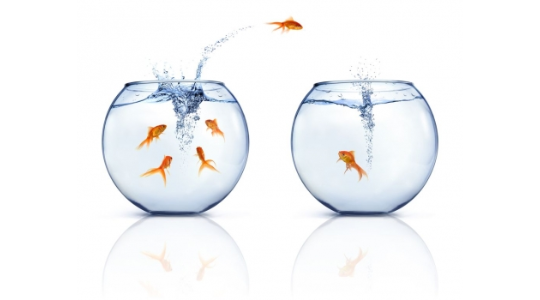


Intro TBD


# Lybraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Sources and some ideas

In [ ]:
#inspiration
https://www.kaggle.com/liujiaqi/employee-resign-initial-eda/notebook
https://rpubs.com/DanielIzaguirre/232058

# Analysing Data

In [32]:
hr=pd.read_csv("HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [68]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [91]:
hr.groupby('sales')['left'].count()

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: left, dtype: int64

### Let's rename appropriately to the column "sales" to "department"

In [121]:
hr.columns=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary']
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.8,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [122]:
#instead of Random, I will use "Others
hr[hr.department == "RandD"] = "Others"

### Breakdown by department

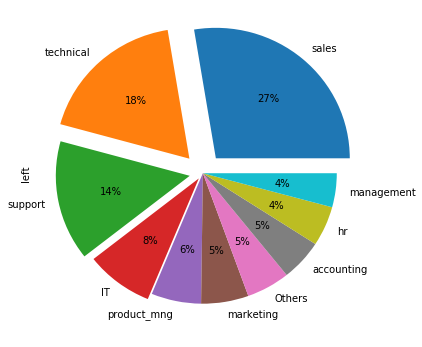

In [231]:
hr.groupby('department')['left'].count().sort_values(ascending=False)

explode=(0.15,0.15,0.1,0.05,0,0,0,0,0,0) #highlight the 4 main values
dep.plot.pie(autopct='%1d%%',figsize=(6,6),use_index=None,explode=explode) #use of autopct to display the percent value 
plt.show()

### Sales are the most common department in the company (27%). Technical and Support are in second and third place in the ranking 

# Brief description of columns in Data set

**Satisfaction_level** :Employee satisfaction level

**Last_evaluation**: column can be used to evaluate the performance of an employee. The data ranges from 0–1, 0 being low performance and 1 being the highest. Using a 0.1 interval let us try and see the employees in the company are doing and how it is correlated to them leaving the company.

**Number of projects**: 

**Average monthly hours**

**Time spent at the company**: years?

**Whether they have had a work accident**: 1 yes, 0 no

**Whether they have had a promotion in the last 5 years**:

**Department**: Sales, Technical, Support, IT, Product Managment, Marketing ,Accounting, Human Resources, Managment and Others(instead of RandD)

**Salary**: 

**Whether the employee has left**: 1 yes, 0 no

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
Others          787
accounting      767
hr              739
management      630
Name: left, dtype: int64

In [33]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [63]:
hr.shape

(14999, 10)

In [64]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [70]:
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


### Is there any "null" value in the data set?

In [56]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
### How many people 

In [37]:
fig = plt.figure(figsize=(20,12))
corr = hr[cols].corr()
plt.show()

NameError: name 'cols' is not defined

In [21]:
hr.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


In [30]:
hr[hr['left']=1]?

SyntaxError: invalid syntax (<ipython-input-30-24e0ff992755>, line 1)